# Classification 

# Performance Measures

## Issue with Accuracy in Imbalanced Datasets
Accuracy alone can be misleading in imbalanced datasets. For instance, if a dataset has 99% of 'yes' labels, a naive model that always predicts 'yes' would have 99% accuracy, which doesn't indicate the model's true predictive power.

## Better Performance Measure: Confusion Matrix

### Components of a Confusion Matrix
- True Negatives (TN)
- False Positives (FP)
- False Negatives (FN)
- True Positives (TP)




### Derived Metrics and Formulas

#### Recall (Sensitivity)
- **Formula**: `Recall = TP / (TP + FN)`
- **Example**: If there are 5 actual positives and the model correctly identifies 3, Recall = 3 / (3 + 2) = 0.6 or 60%.

#### Precision
- **Formula**: `Precision = TP / (TP + FP)`
- **Example**: If the model predicts 4 positives but only 3 of them are correct, Precision = 3 / (3 + 1) = 0.75 or 75%.

#### F1 Score
- **Formula**: `F1 = 2 × (Precision × Recall) / (Precision + Recall)`
- F1 Score is especially useful when you seek a balance between Precision and Recall.


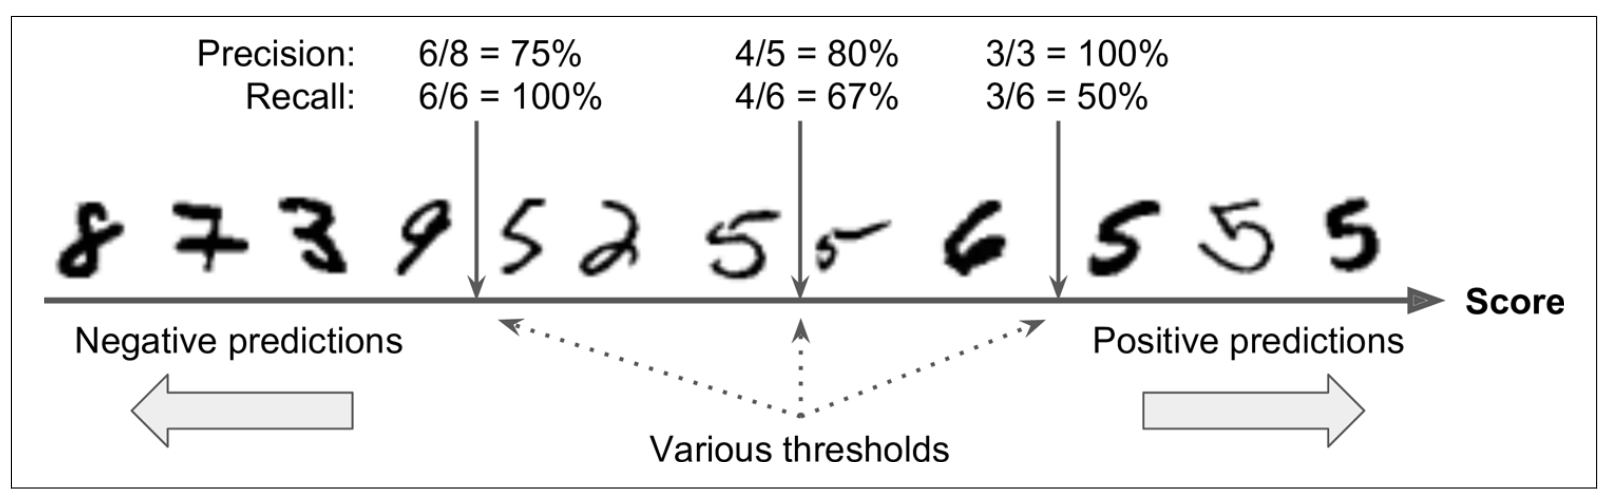


## Precision vs. Recall
### Contextual Importance
The relative importance of precision and recall depends on the application. 
- **Example 1**: For child-safe video filtering, high precision (fewer false positives) is more crucial than high recall. 
- **Example 2**: In shoplifter detection, high recall (catching almost all shoplifters) is more critical, even at the cost of lower precision (more false alerts).

### Precision/Recall Trade-off
Selecting a Balance: The choice of balance between precision and recall depends on specific project needs. For example, one might choose a point just before precision drops sharply, say at 60% recall.

### Example Illustrating Precision and Recall
- **Scenario**: Consider two fishermen, Fisherman A and Fisherman B.
  - **Fisherman A (High Precision, Low Recall)**: Fisherman A is very selective and only tries to catch expensive fish. He catches fewer fish, but almost all of them are expensive. This represents high precision (most catches are the 'positive' outcome he wants) but low recall (many expensive fish are not caught).
  - **Fisherman B (Low Precision, High Recall)**: Fisherman B tries to catch as many fish as possible, hoping some of them are expensive. He catches a lot of fish, but only a few are expensive. This represents low precision (fewer catches are the 'positive' desired outcome) but high recall (he catches most of the expensive fish in the area, along with many others).



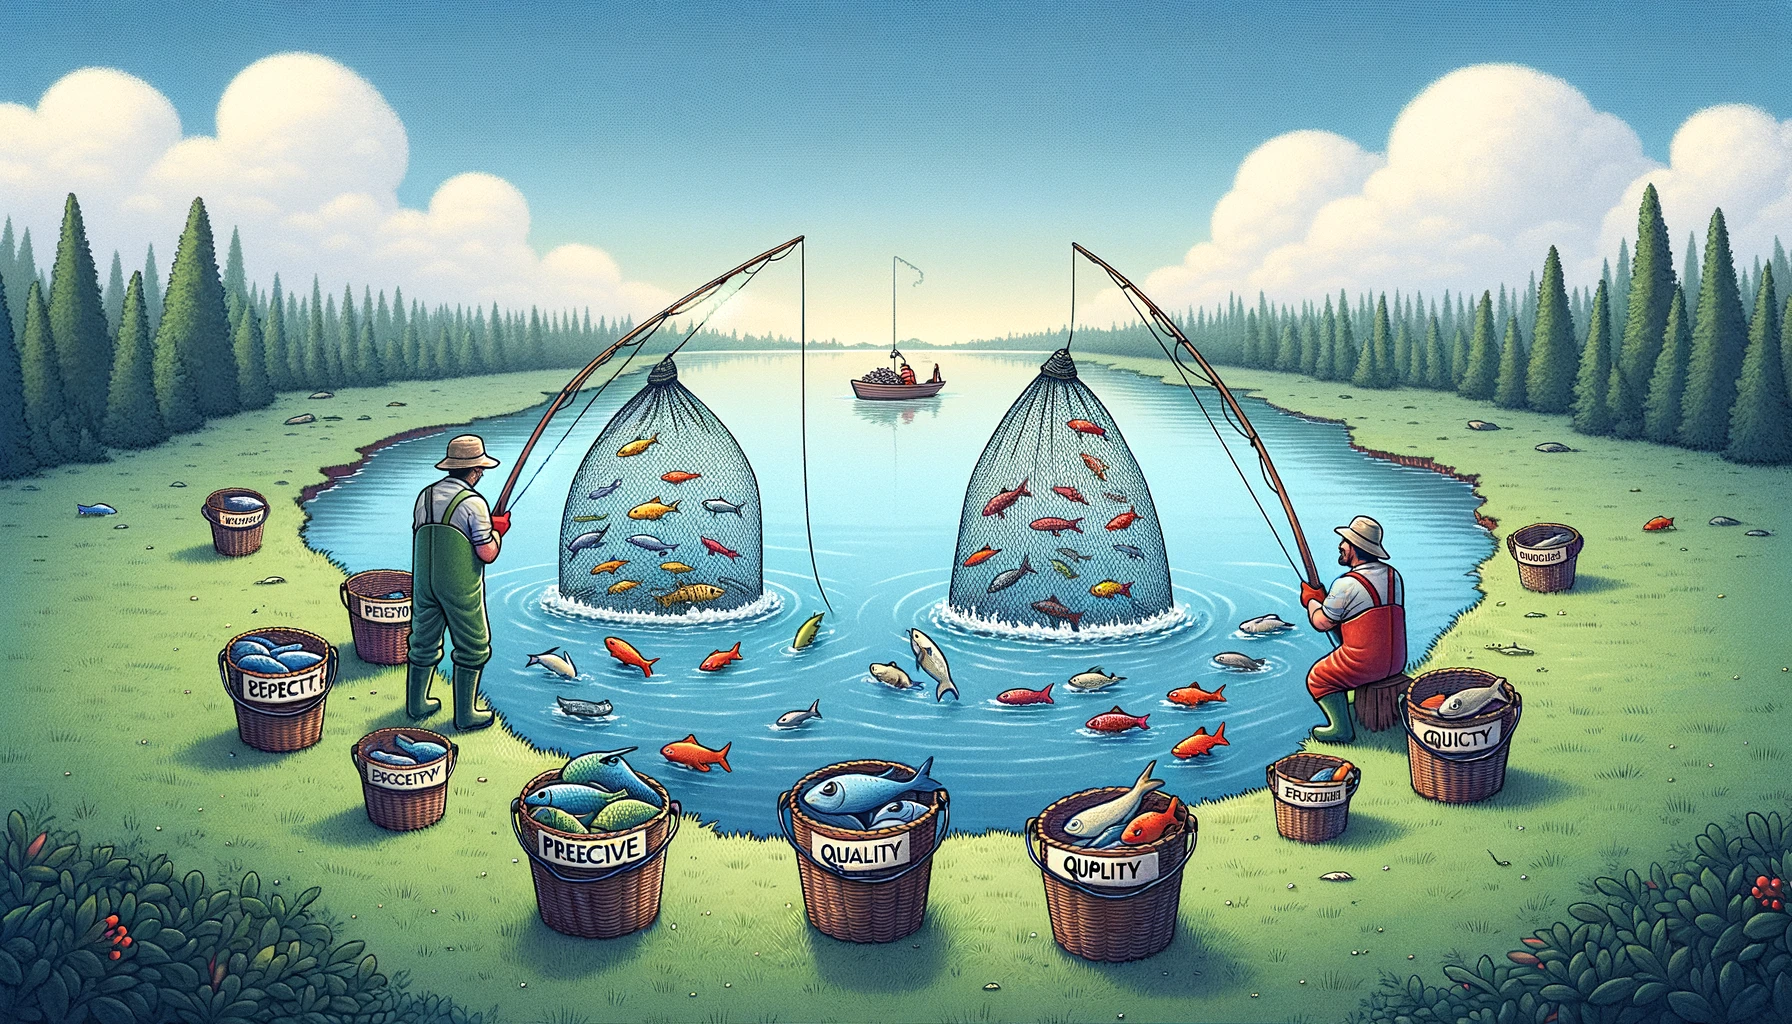




## ROC Curve and AUC
- **ROC Curve**: Plots True Positive Rate (Recall) versus False Positive Rate (1 - Specificity).
- **Area Under Curve (AUC)**: Measures the entire two-dimensional area underneath the ROC curve. A perfect classifier has an AUC of 1, while a random classifier has an AUC of 0.5.


## Multiclass Classification
Handling Multiple Classes: Some algorithms like SGD classifiers, Random Forest classifiers, and Naive Bayes can handle multiple classes natively. 
- **Binary Classifiers for Multiclass Tasks**:
  - **One-versus-Rest (OvR)**: Train a separate classifier for each class.
  - **One-versus-One (OvO)**: Train a classifier for every pair of classes. For N classes, there are N × (N – 1) / 2 classifiers.

## Error Analysis
Using Confusion Matrix for Insights:
- **Example Code**: `conf_mx = confusion_matrix(y_train, y_train_pred)`
- Analyzing the matrix can reveal specific areas where the classifier is underperforming.
- The brightness of cells in the confusion matrix can indicate the frequency of predictions and errors. 
  - **1st image**: The darkest colors is where there are more errors.
  - **2nd image**: The asymmetry changes in the color indicate problems in classification, if there is no symmetry indicates that the column there are not many images, ex: 8.
  
  
  
  
  
 
  
  
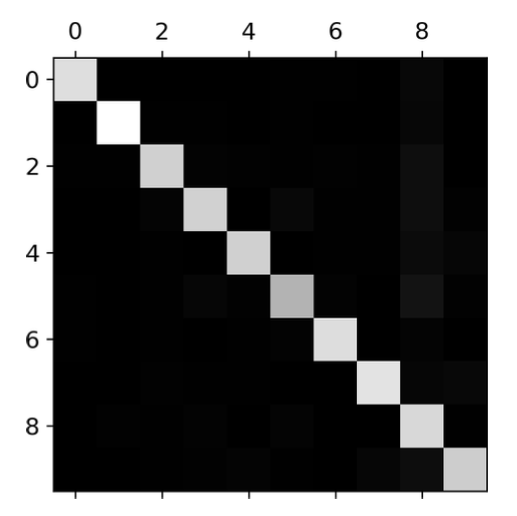





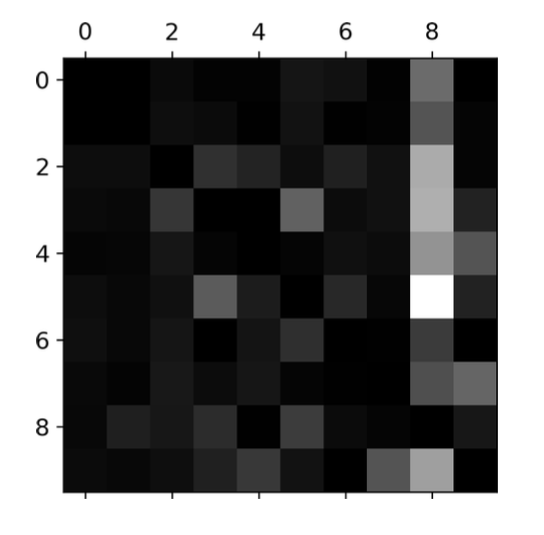




## Multilabel Classification  
Handling Multiple Labels: KNeighborsClassifier can be used for tasks where each instance may have multiple labels. 
- **Example**: In face recognition, a single image might contain several known faces. 
- **Data Balance**: Ensuring balance in the dataset is crucial to prevent bias towards more frequent labels.

    

## Multioutput Classification
- **Definition**: A generalization of multilabel classification where each label can have multiple classes.
- **Example Use-case**: Building a system to remove noise from images, where each pixel can have multiple class labels representing noise levels.

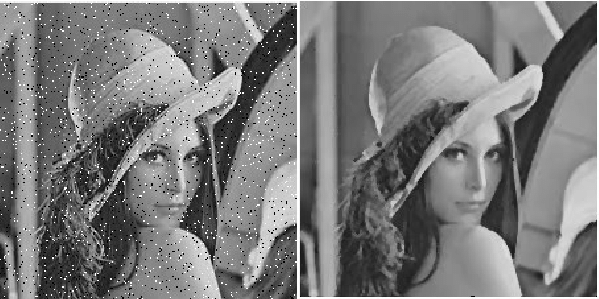

### Trying out some code examples form the book

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/Users/nilmonfortvila/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X, y = mnist["data"], mnist["target"]

In [10]:
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()


In [13]:
 y[1]

'0'

In [16]:
import numpy as np
y = y.astype(np.uint8)
y


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [18]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits y_test_5 = (y_test == 5)

In [19]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [28]:
#sgd_clf.predict([some_digit])

### Implementing Cross-Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5): 
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565, and 0.96495

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator): 
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool) Can you guess this model’s accuracy? Let’s find out:


In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy") array([0.91125, 0.90855, 0.90915])

Even though the function is Dummy, it will get a 90% accuracy, therefore is important to use precision, recall and F1 score